# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1427]:
# Start coding here...
#Importing  libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

### **DATA** **COLLECTION**

In [1428]:
# reading the data 
df = pd.read_csv('recipe_traffic.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [1429]:
# checking the dimension of the data 
df.shape

(947, 8)

There are 8 columns and 947 rows in this dataset

## DATA VALIDATION
Data cleaning and preprocessing

In [1430]:
# Check for missing data
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

## Observations
-  There is a substantial amount of missing data in the target variable (high_traffic).
 
-  The missing data constitutes about 40% of the entire data avialable .

-  There is the exact number of missing data across some columns, that could indicate a pattern. SO i have to investigate further

## ACTION
Check for Row-Wise Missing Data:

Inspect rows to see if the same rows have missing values across these columns.

In [1431]:
columns_with_missing = ['calories', 'carbohydrate', 'sugar', 'protein']

# Filter the DataFrame to rows where any of the selected columns have missing values
rows_with_missing = df[df[columns_with_missing].isnull().any(axis=1)]

# Print the filtered DataFrame
rows_with_missing


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


## Observation
There is really a pattern, the missing data is the same across the nutritional columns . This likely indicates data quality issues 

## Action
I would Drop all the affected rows to prevent data duplication

In [1432]:
nutrient_cols = ['calories', 'protein', 'carbohydrate', 'sugar']
df = df.dropna(subset=nutrient_cols)

In [1433]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


In [1434]:
# checking the see the updated missing data info
df.isnull().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    360
dtype: int64

GREAT!, Now i would investigate the 'high_traffic' column further to know why a substantial amount of its data is null

In [1435]:
# checking to see the number of unique values in the column
df['high_traffic'].nunique()

1

## Observation

The high_traffic column has just one unique value 'high', which likely indicates that times the recipe had low traffic ,the data wasn't recorded  .

## Action
Fill all Null values with ' LOW'.

In [1436]:
# Fill in the Null values in the column with 'Low'
df['high_traffic'] = df['high_traffic'].fillna('Low')

In [1437]:
# renaming the high_traffic column
df = df.rename(columns={'high_traffic': 'traffic'})

In [1438]:
df['traffic'].value_counts()

High    535
Low     360
Name: traffic, dtype: int64

## observation 
The data is the target column is a little imbalanced , I would not take any further actions on it , because it is not very significant 

In [1439]:
df['category'].nunique()

11

## Observation
1.) There are 11 categories instead of just 10 groupings

## ACTION
I would remove duplicates by merging 'chicken breast' to the 'chicken' grouping

In [1440]:

df['category'] = df['category'].str.lower()

#  To Replace 'chicken breast' with 'chicken'
df['category'] = df['category'].replace('chicken breast', 'chicken')

# print
print(df['category'].value_counts())

chicken          163
breakfast        106
beverages         92
potato            83
lunch/snacks      82
vegetable         78
dessert           77
meat              74
pork              73
one dish meal     67
Name: category, dtype: int64


In [1441]:
print(df['servings'].unique())

['4' '1' '2' '6' '4 as a snack' '6 as a snack']


## observation
- The values are  non numeric values 
- Even though they are non numeric , there is a string like input 

## Action
. I would investigate further by subsetting all the rows with these values

In [1442]:
subset_df = df[df['servings'].isin(['4 as a snack', '6 as a snack'])]

subset_df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,traffic
451,452,1542.53,14.73,5.71,29.92,lunch/snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,lunch/snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,lunch/snacks,4 as a snack,Low


## Observation

There are three rows with these values , and they all belong to the lunch/snacks category . I would investigate further by checking if there are just 3 lunch/snacks entries in the category column

In [1443]:
df['category'].value_counts()

chicken          163
breakfast        106
beverages         92
potato            83
lunch/snacks      82
vegetable         78
dessert           77
meat              74
pork              73
one dish meal     67
Name: category, dtype: int64

In [1444]:
lunch_snacks = df[df['category'] == 'lunch/snacks']
lunch_snacks


,recipe,calories,carbohydrate,sugar,protein,category,servings,traffic
7,8,299.14,3.17,0.40,32.40,lunch/snacks,4,Low
33,34,497.17,1.47,1.51,2.97,lunch/snacks,6,High
35,36,796.89,29.10,9.63,2.28,lunch/snacks,2,Low
58,59,6.23,56.43,5.60,2.12,lunch/snacks,6,High
70,71,100.00,95.89,10.20,114.60,lunch/snacks,4,Low
...,...,...,...,...,...,...,...,...
906,907,194.37,12.17,1.58,3.67,lunch/snacks,4,Low
908,909,109.42,51.67,2.54,4.50,lunch/snacks,1,High
909,910,868.76,46.47,2.68,23.05,lunch/snacks,1,High
930,931,607.52,34.88,5.49,9.79,lunch/snacks,4,High


From the above dataframe , i conclude that all the values in the servings column represent lunch , except from where it was specified that the value represent the number of servings for snacks

## Action
I'll seperate lunch/snacks into 2 categories - lunch and snacks

Snacks category will be the values that have 'as a snack' suffix.

I'll remove the suffix and convert the column to a numeric column

In [1445]:
# Fixing Serving column

df['category'] = np.where(df['servings'].str.contains('as a snack'), 'Snacks', df['category'])

df['category'] = np.where((df['category'] == 'Lunch/Snacks'), 'Lunch', df['category'])

df['servings'] = df['servings'].str.replace(' as a snack', '').astype(int)

In [1446]:
df['servings'] = pd.to_numeric(df['servings'])

In [1447]:
df['servings'].value_counts()

4    367
6    185
2    174
1    169
Name: servings, dtype: int64

## **Data Validation & Cleaning Summary**:
- There were initially 947 records in the dataset but after dropping the 52 rows that had missing values across all 4 nutrient-related columns, the dataset now has 895 records.

- The high_traffic column had 40.22% missing values

- I replaced the null values with 'low'. I did this because the column had only 1 category 'high' but a classification task requires at least 2 categories.

- The 'category' column had 11 categories/ unique values instead of 10 as specified on the data dictionary.

- I combined the added category 'chicken breast' with standard category 'chicken' by replacing all 'chicken breast' categories with 'chicken'

- The 'serving' column which was specified as a numerical column in the data dictionary was labeled as an object column

- After investigation, I found some non-numeric data in the serving column which were associated with the lunch/snack category in the category column

- I split lunch/snack into separate categories to justify the removal of the suffix 'as a snack' in the non-numerical data found in the 'servings' column

## EXPLORATORY DATA ANALYSIS

In [1448]:
#Descriptive statistics to understand the data better
summary_stats = df.describe()
summary_stats= summary_stats.round(2)

# Display the rounded summary statistics

summary_stats

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.00,895.00,895.00,895.00,895.00,895.00
mean,473.65,435.94,35.07,9.05,24.15,3.46
std,272.76,453.02,43.95,14.68,36.37,1.74
min,2.00,0.14,0.03,0.01,0.00,1.00
25%,237.50,110.43,8.38,1.69,3.20,2.00
50%,475.00,288.55,21.48,4.55,10.80,4.00
75%,708.50,597.65,44.96,9.80,30.20,4.00
max,947.00,3633.16,530.42,148.75,363.36,6.00


## Observations:
- All features (calories, carbohydrate, sugar, protein) have a wide range of values, with high maximum values relative to their means. This suggests the presence of some high-value outliers which may significantly affect the distribution and statistical analyses.

- The high standard deviations for all features suggest substantial variability in the nutritional content of the recipes. This variability can impact model performance and may require normalization or standardization of features during preprocessing.
 
- Given the large range between the minimum and maximum values, particularly for carbohydrates and protein, the data may be skewed and contain outliers.

- The median values of all features are significantly lower than the means, indicating a right-skewed distribution (long tail to the right). This suggests that while most recipes have moderate values, there are some recipes with very high values that skew the average upwards

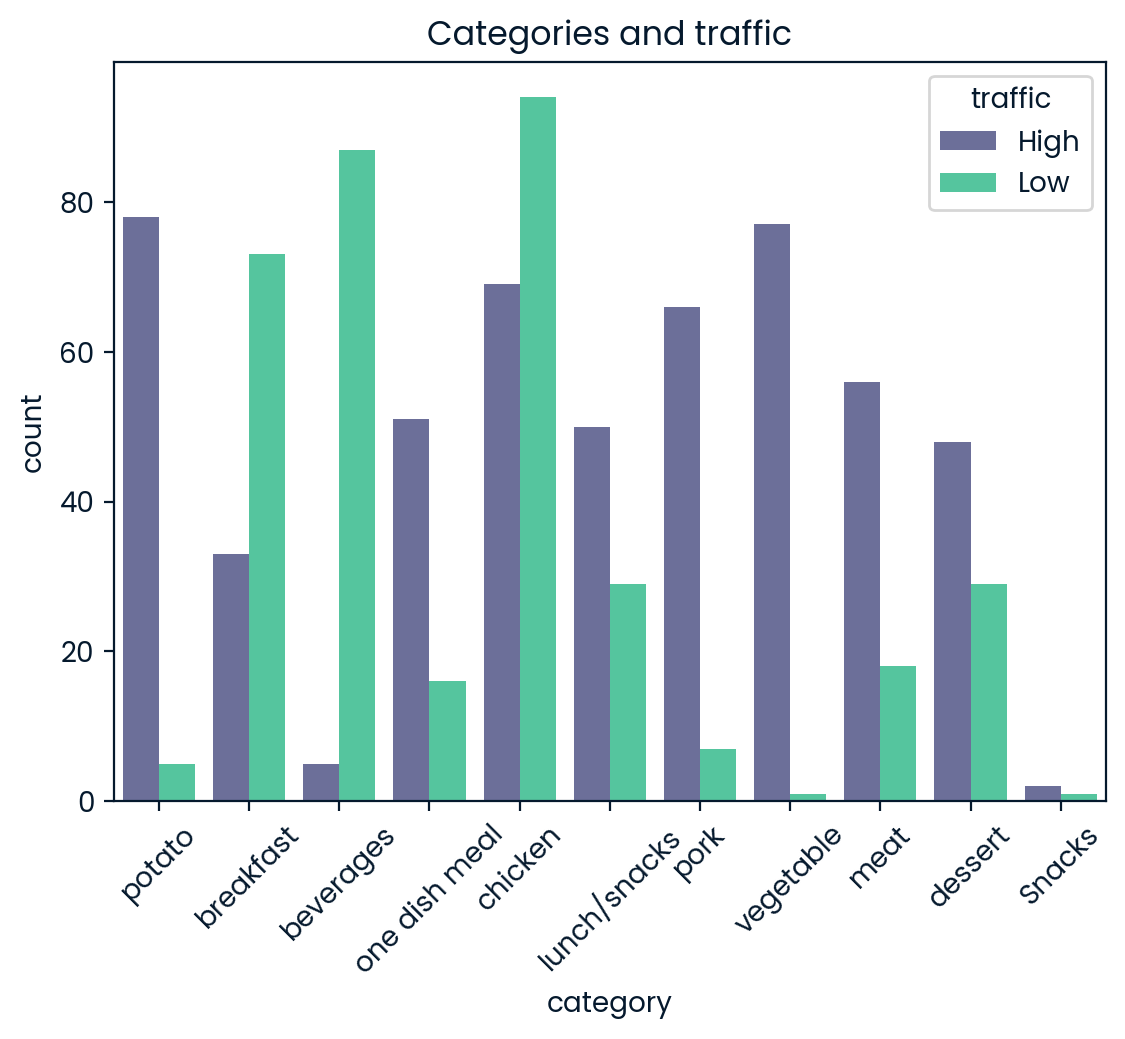

In [1449]:
# visualization the categories and their associated traffics 
sns.countplot(x = 'category', hue = 'traffic', data = df)
plt.xticks(rotation=45)
plt.title("Categories and traffic")
plt.show()

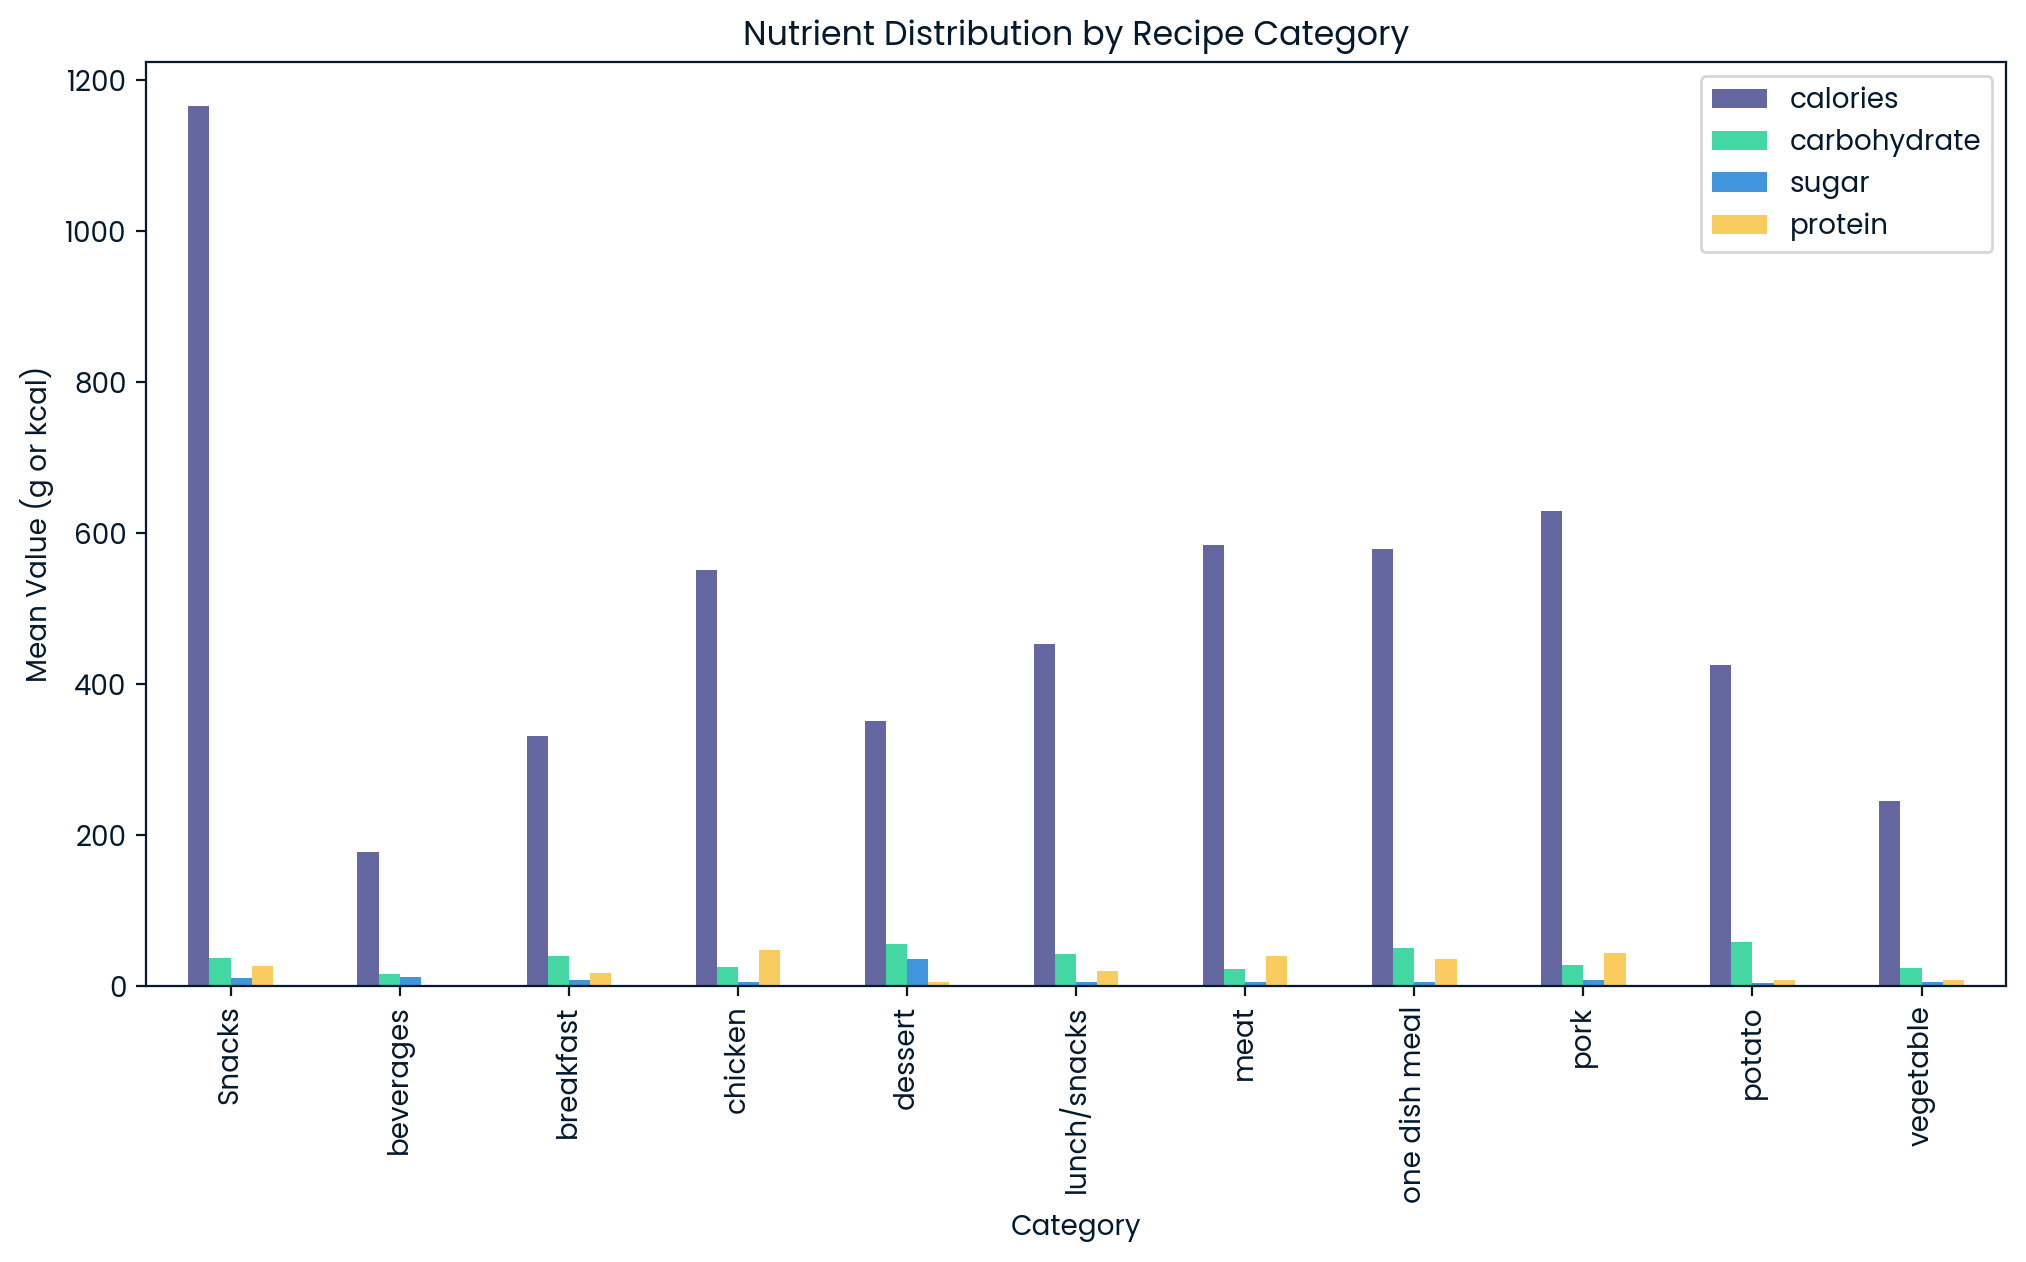

In [1450]:
grouped_df = df.groupby('category')[['calories', 'carbohydrate', 'sugar', 'protein']].mean()

# Plot the results using a bar chart
grouped_df.plot(kind='bar', figsize=(12, 6))

# Add title and labels
plt.title('Nutrient Distribution by Recipe Category')
plt.xlabel('Category')
plt.ylabel('Mean Value (g or kcal)')

# Show the plot
plt.show()

In [1453]:
df['category'].value_counts()

chicken          163
breakfast        106
beverages         92
potato            83
lunch/snacks      79
vegetable         78
dessert           77
meat              74
pork              73
one dish meal     67
Snacks             3
Name: category, dtype: int64

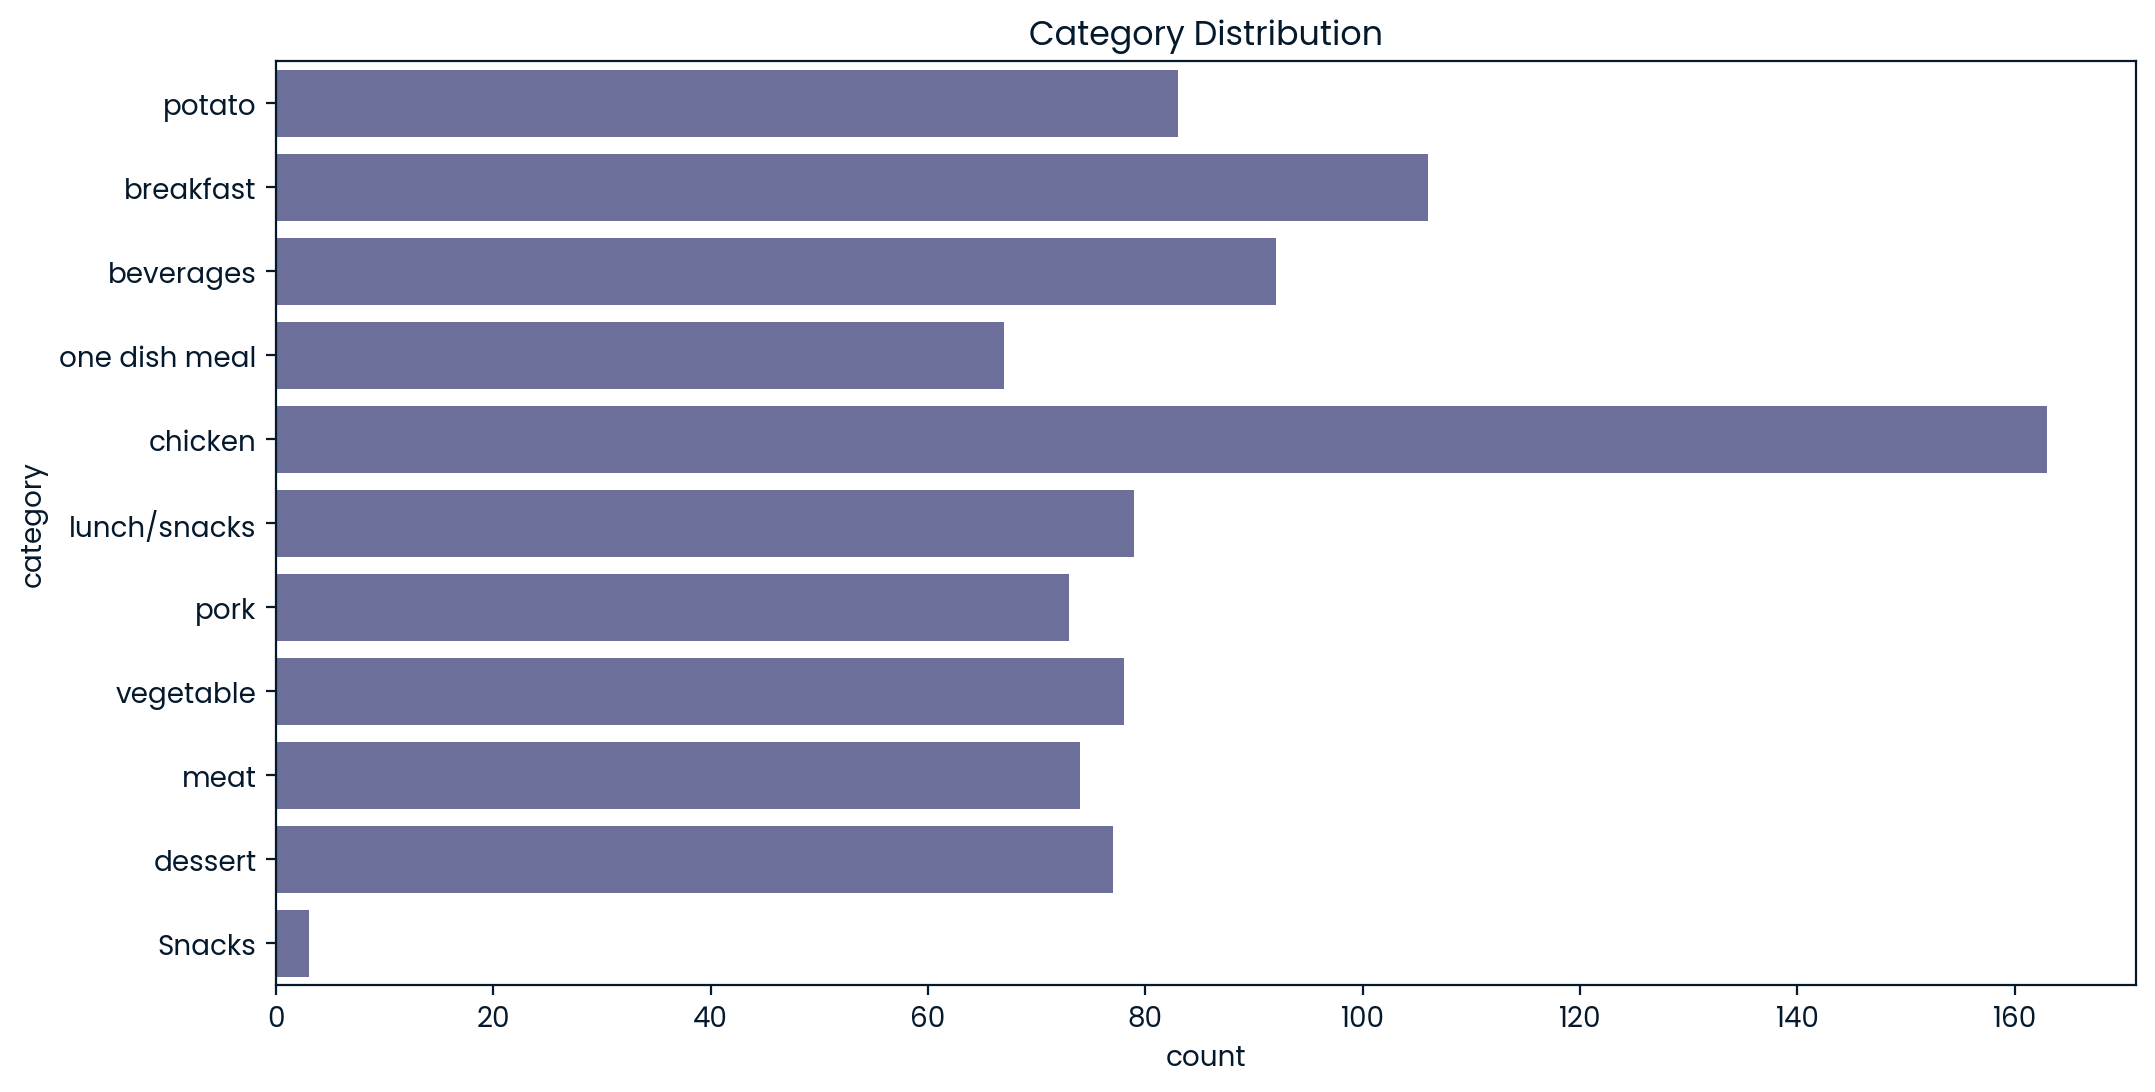

In [1454]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['category'])
plt.title('Category Distribution')
plt.show()

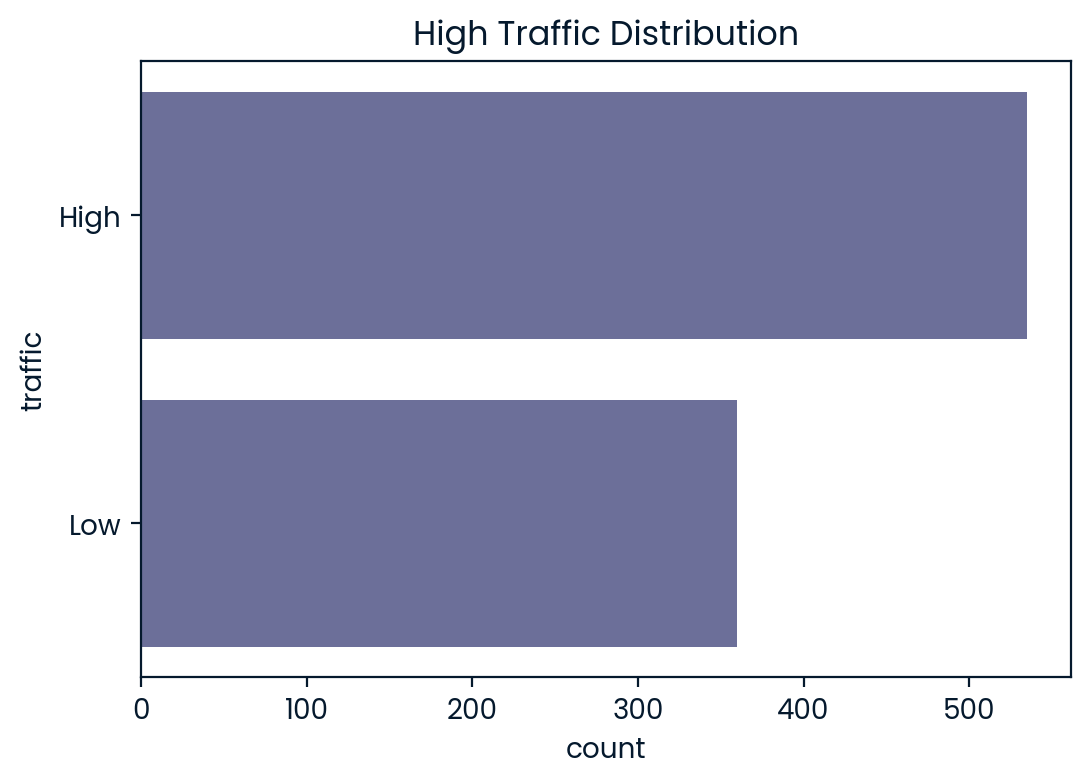

In [1455]:
plt.figure(figsize=(6, 4))
sns.countplot(df['traffic'])
plt.title('High Traffic Distribution')
plt.show()

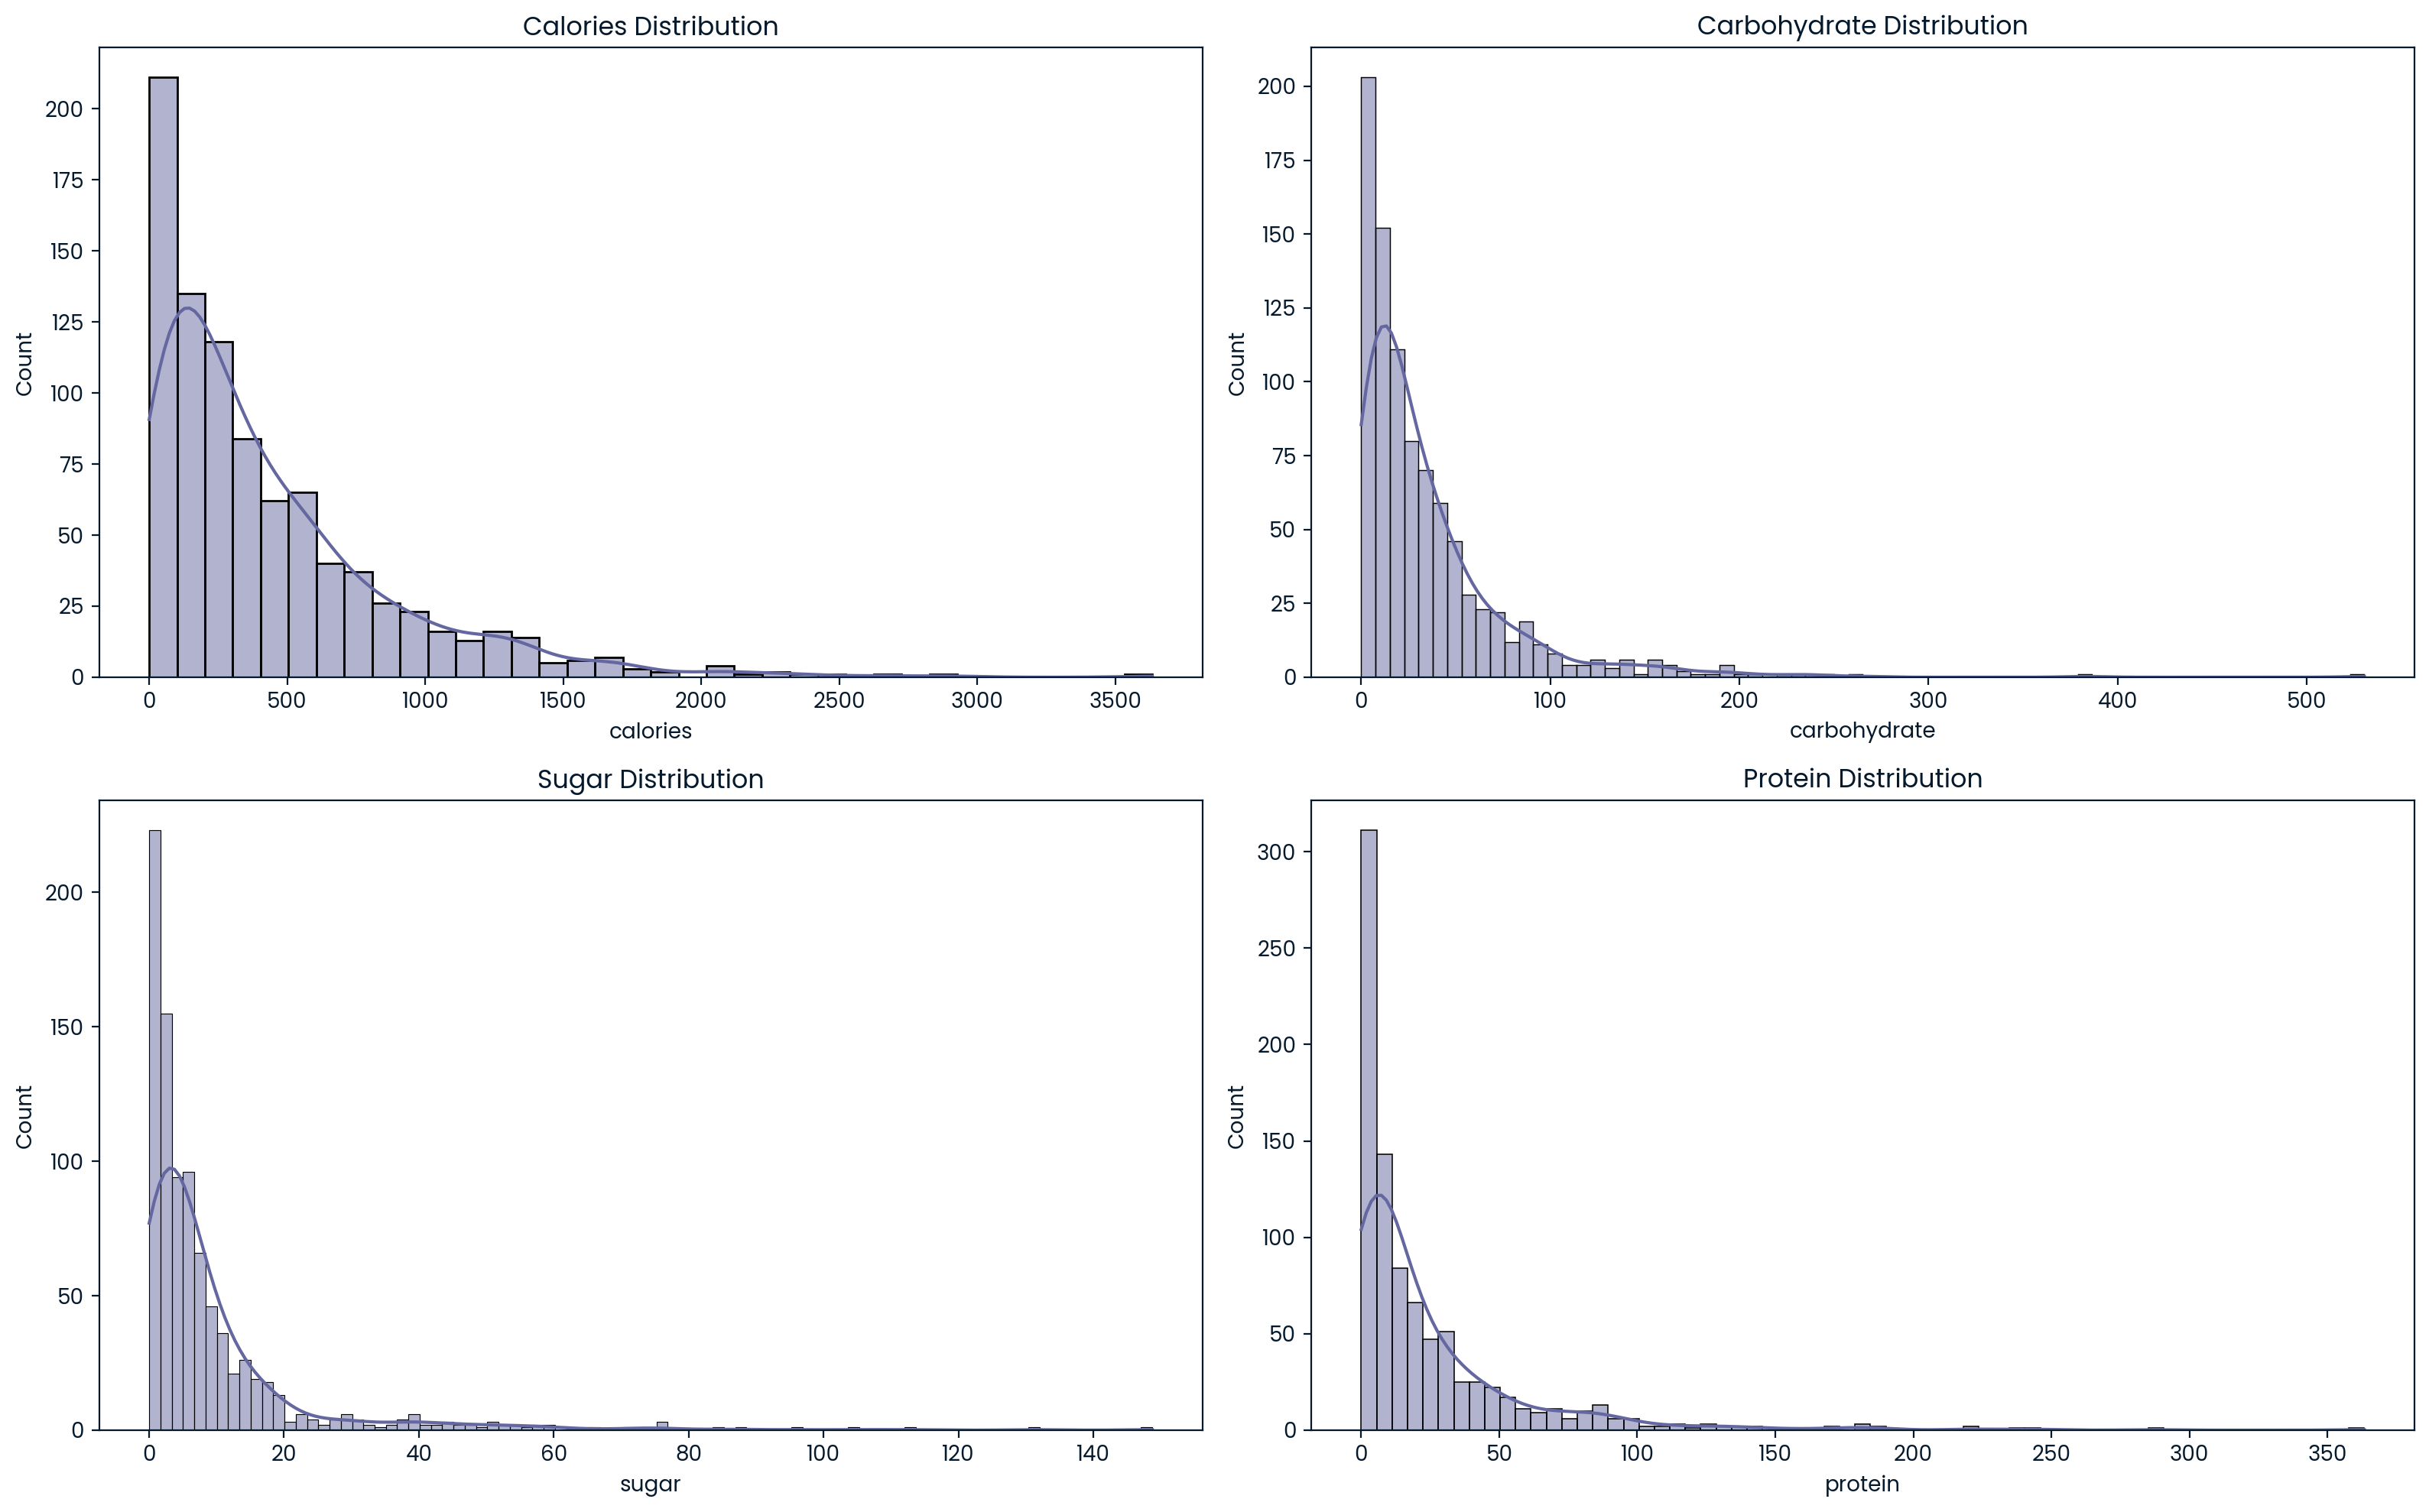

In [1456]:

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['calories'], kde=True)
plt.title('Calories Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['carbohydrate'], kde=True)
plt.title('Carbohydrate Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['sugar'], kde=True)
plt.title('Sugar Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['protein'], kde=True)
plt.title('Protein Distribution')

plt.tight_layout()
plt.show()

## Observation
- Right-Skewed Distribution:

The sugar and protein distribution is heavily right-skewed, with a large number of recipes containing low amounts of sugar and protein respectively and a few recipes containing significantly higher amounts.

- Concentration of Low Sugar and protein Content:  Most recipes have a low sugar and protein content respectively , as indicated by the high count at the lower end of the sugar and protein scale. This is evident from the tall bars near the left side of the plot.



- Long Tail:  There is a long tail extending towards the right, indicating that while most recipes have low sugar and protein content, there are a few recipes with very high sugar and protein content.

## ACTION
I would categorize recipes into low, medium, and high sugar and protein content

In [1457]:

# Define the sugar content column
sugar_column = 'sugar'

# Calculate the quantiles for categorization
low_threshold = df[sugar_column].quantile(0.25)
high_threshold = df[sugar_column].quantile(0.75)

# Function to categorize sugar content
def categorize_sugar(content):
    if content <= low_threshold:
        return 'Low'
    elif content <= high_threshold:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to create a new column
df['sugar_category'] = df[sugar_column].apply(categorize_sugar)

# Display the updated DataFrame with the new sugar category
print(df[['recipe', sugar_column, 'sugar_category']].head())

   recipe  sugar sugar_category
1       2   0.66            Low
2       3   3.09         Medium
3       4  38.63           High
4       5   0.80            Low
5       6   1.65            Low


In [1458]:
protein_column = 'protein'
low_threshold_protein = df[protein_column].quantile(0.25)
high_threshold_protein = df[protein_column].quantile(0.75)

def categorize_protein(content):
    if content <= low_threshold_protein:
        return 'Low'
    elif content <= high_threshold_protein:
        return 'Medium'
    else:
        return 'High'

df['protein_category'] = df[protein_column].apply(categorize_protein)
print(df[['recipe', protein_column, 'protein_category']].head())

   recipe  protein protein_category
1       2     0.92              Low
2       3     2.88              Low
3       4     0.02              Low
4       5     0.53              Low
5       6    53.93             High


In [1459]:
carbohydrate_column = 'carbohydrate'

# Calculate the quantiles for categorization
low_threshold_carbohydrate = df[carbohydrate_column].quantile(0.25)
high_threshold_carbohydrate = df[carbohydrate_column].quantile(0.75)

# Function to categorize protein content
def categorize_carbohydrate(content):
    if content <= low_threshold_carbohydrate:
        return 'Low'
    elif content <= high_threshold_carbohydrate:
        return 'Medium'
    else:
        return 'High'


df['carbohydrate_category'] = df[carbohydrate_column].apply(categorize_carbohydrate)
print(df[['recipe', carbohydrate_column, 'carbohydrate_category']].head())

   recipe  carbohydrate carbohydrate_category
1       2         38.56                Medium
2       3         42.68                Medium
3       4         30.56                Medium
4       5          1.85                   Low
5       6          3.46                   Low


In [1460]:
calories_column = 'calories'

# Calculate the quantiles for categorization
low_threshold_calories = df[calories_column].quantile(0.25)
high_threshold_calories = df[calories_column].quantile(0.75)

# Function to categorize protein content
def categorize_calories(content):
    if content <= low_threshold_calories:
        return 'Low'
    elif content <= high_threshold_calories:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to create a new column
df['calories_category'] = df[calories_column].apply(categorize_calories)

# Display the updated DataFrame with the new protein category
print(df[['recipe', calories_column, 'calories_category']].head())

   recipe  calories calories_category
1       2     35.48               Low
2       3    914.28              High
3       4     97.03               Low
4       5     27.05               Low
5       6    691.15              High


In [1461]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,traffic,sugar_category,protein_category,carbohydrate_category,calories_category
1,2,35.48,38.56,0.66,0.92,potato,4,High,Low,Low,Medium,Low
2,3,914.28,42.68,3.09,2.88,breakfast,1,Low,Medium,Low,Medium,High
3,4,97.03,30.56,38.63,0.02,beverages,4,High,High,Low,Medium,Low
4,5,27.05,1.85,0.80,0.53,beverages,4,Low,Low,Low,Low,Low
5,6,691.15,3.46,1.65,53.93,one dish meal,2,High,Low,High,Low,High


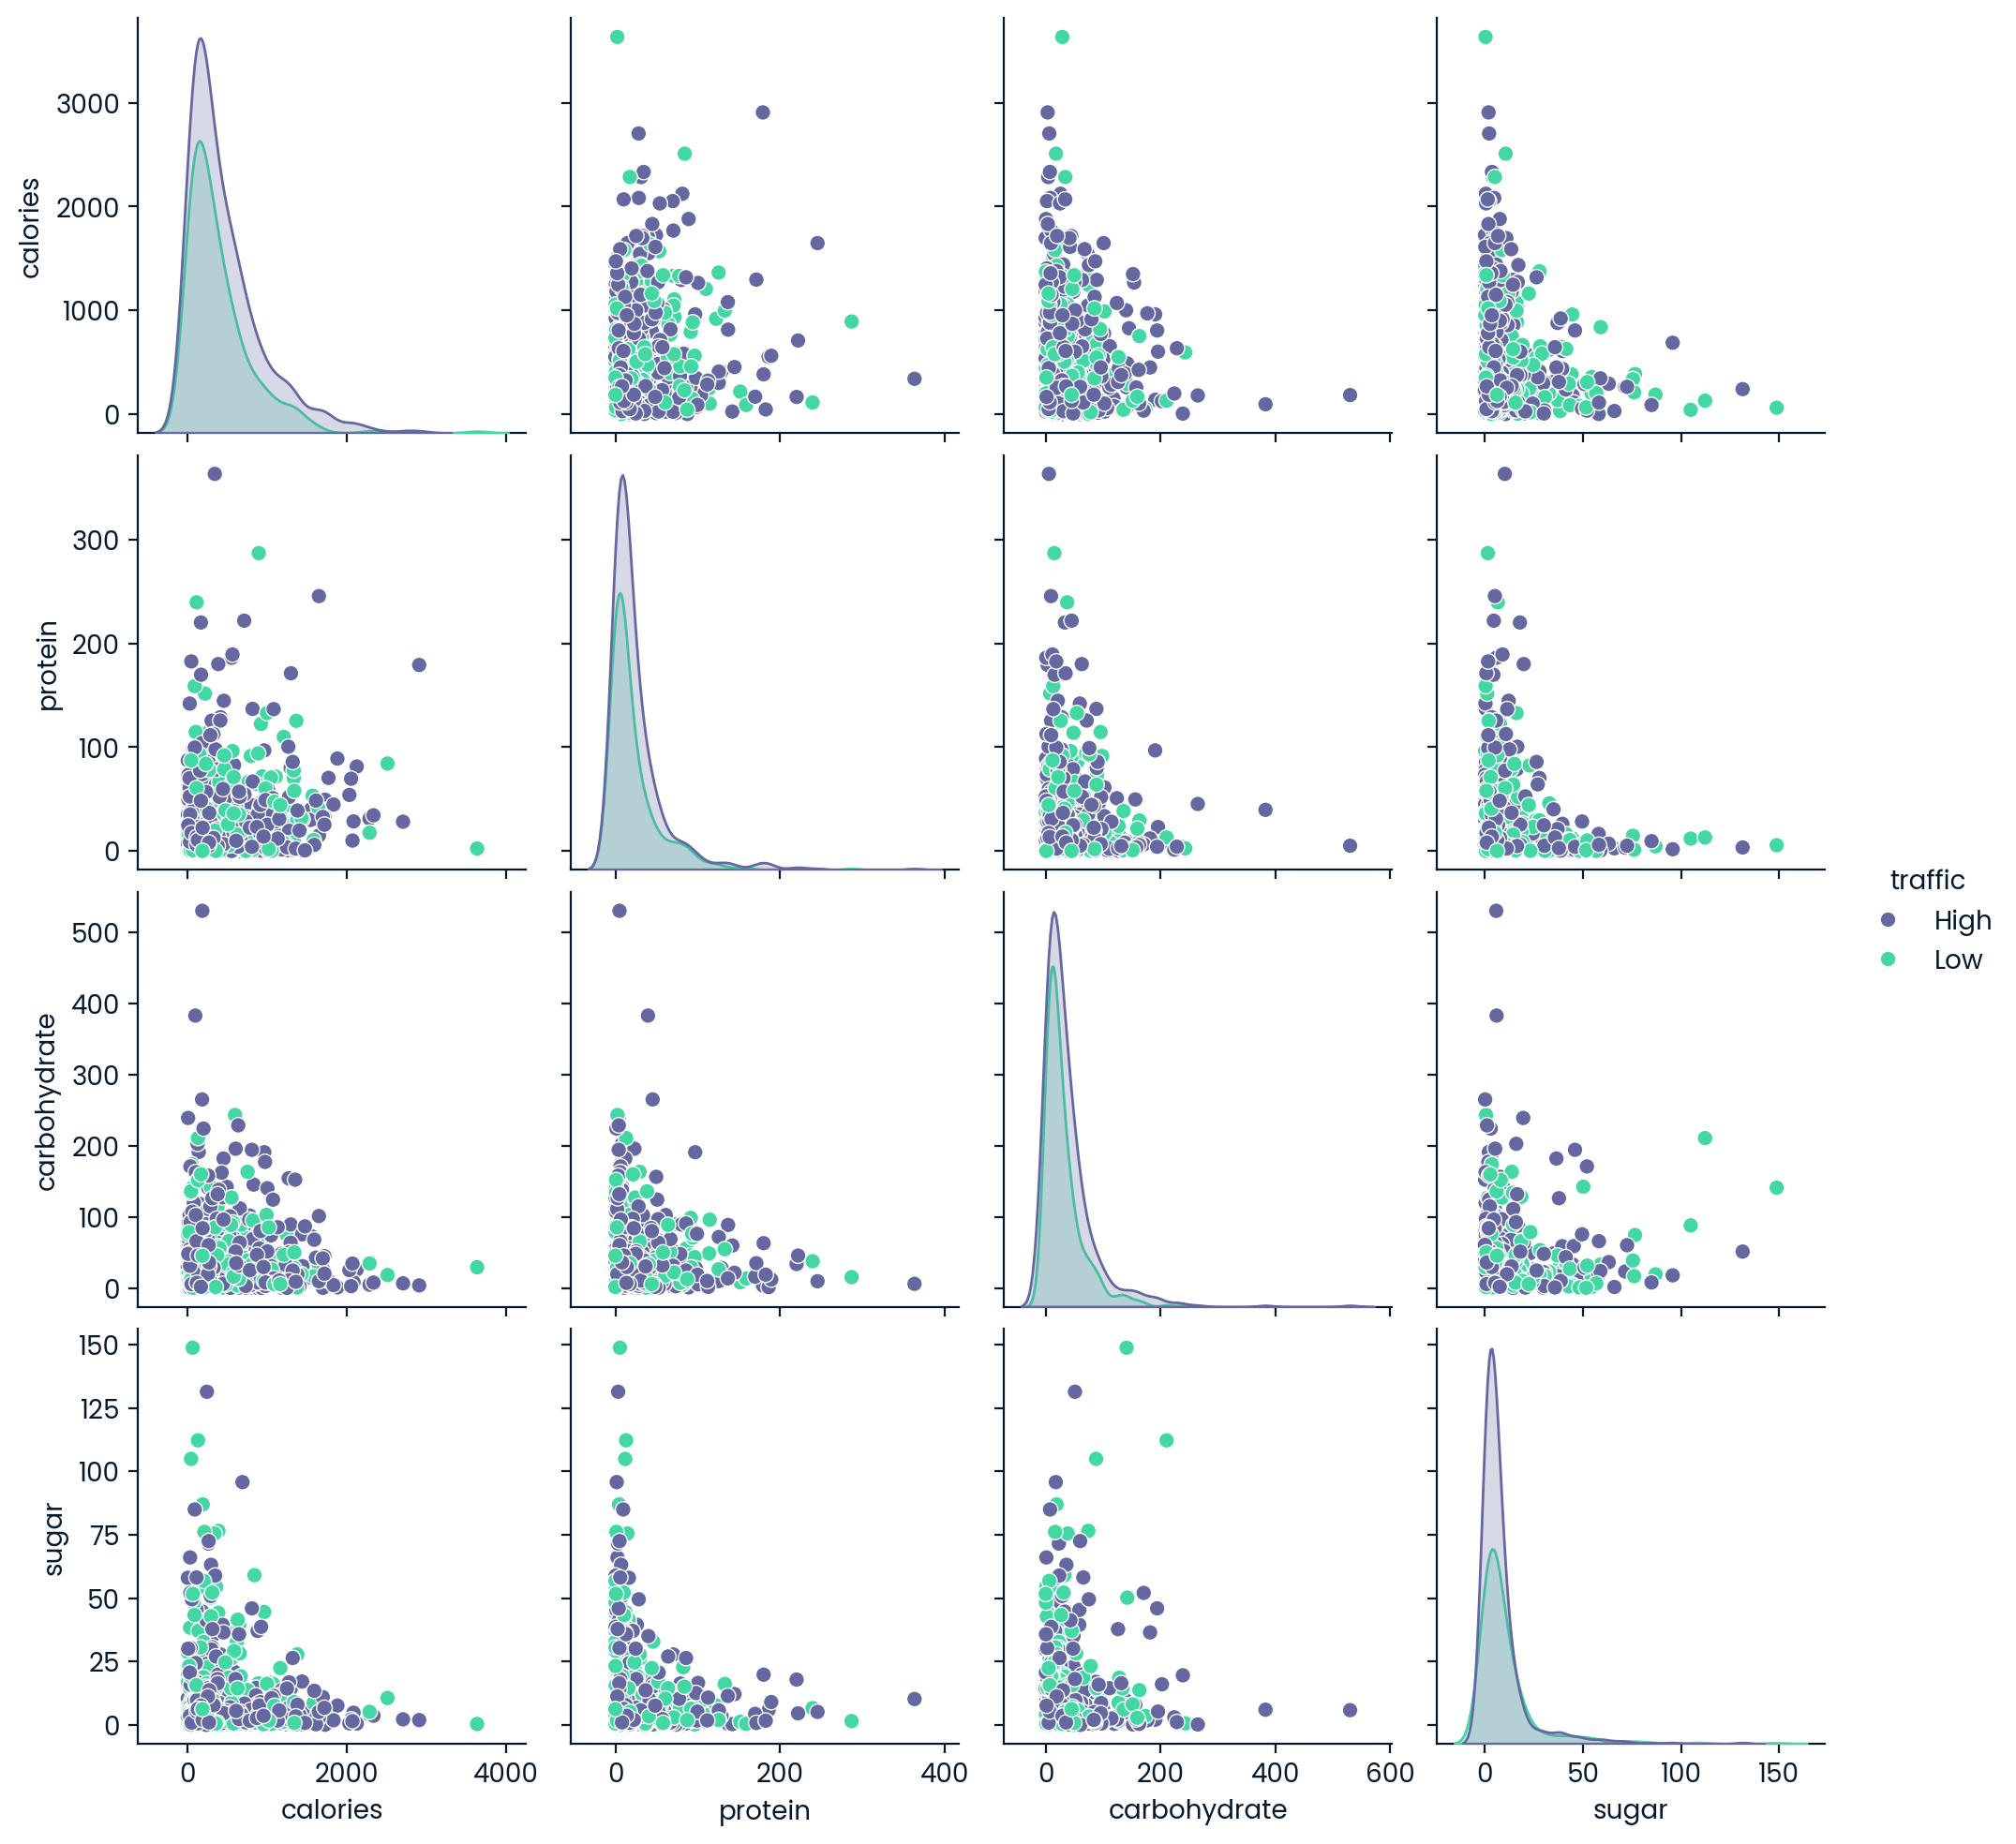

In [1462]:
sns.pairplot(df, hue='traffic', vars=nutrient_cols)
plt.show()

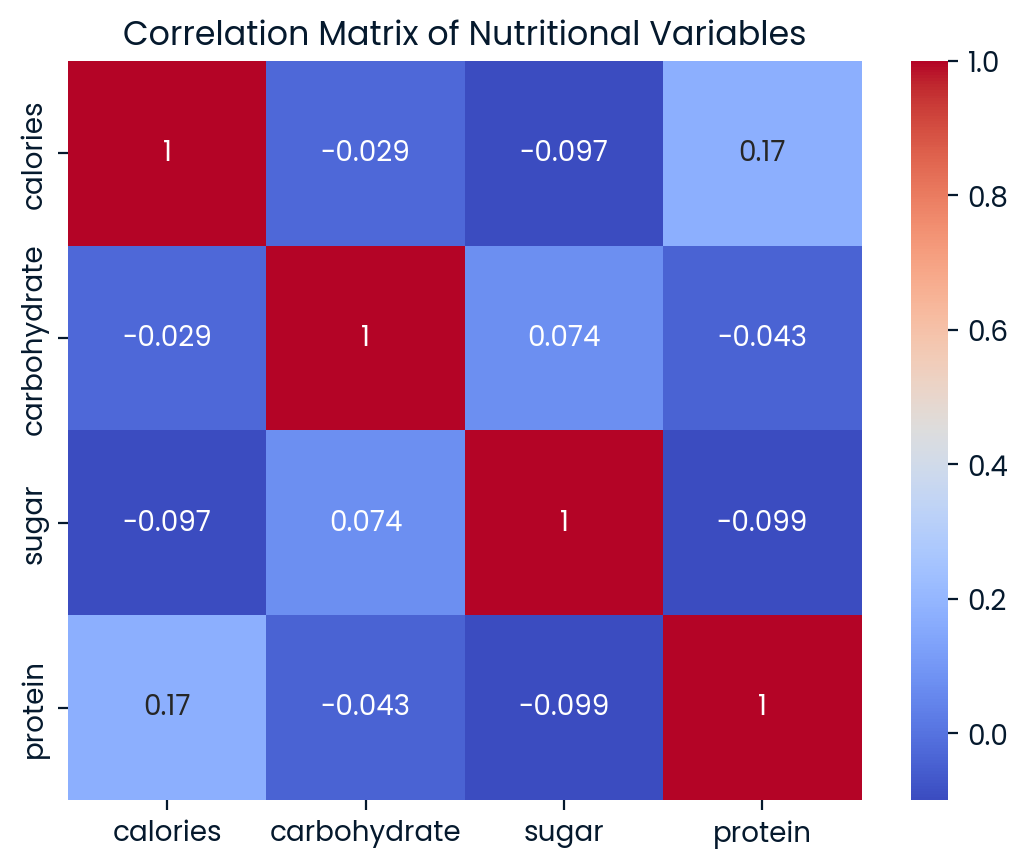

In [1463]:
# Correlation matrix heatmap for numerical variables
correlation_matrix = df[['calories', 'carbohydrate', 'sugar', 'protein']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Nutritional Variables')
plt.show()


## Observation
In summary, while there are some tendencies in the data, such as slight increases or decreases in certain nutrients with changes in calorie content or other nutrients, these relationships are very weak and not strong predictors of each other.

This is good because nutritional needs and diet plans of various individuals differ



In [1464]:
df['category'].unique()

array(['potato', 'breakfast', 'beverages', 'one dish meal', 'chicken',
       'lunch/snacks', 'pork', 'vegetable', 'meat', 'dessert', 'Snacks'],
      dtype=object)

In [1465]:
# one hot encoding for the categorical column

df = pd.get_dummies(df, columns=['category'])

df.head()

,recipe,calories,carbohydrate,sugar,protein,servings,traffic,sugar_category,protein_category,carbohydrate_category,calories_category,category_Snacks,category_beverages,category_breakfast,category_chicken,category_dessert,category_lunch/snacks,category_meat,category_one dish meal,category_pork,category_potato,category_vegetable
1,2,35.48,38.56,0.66,0.92,4,High,Low,Low,Medium,Low,0,0,0,0,0,0,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,1,Low,Medium,Low,Medium,High,0,0,1,0,0,0,0,0,0,0,0
3,4,97.03,30.56,38.63,0.02,4,High,High,Low,Medium,Low,0,1,0,0,0,0,0,0,0,0,0
4,5,27.05,1.85,0.80,0.53,4,Low,Low,Low,Low,Low,0,1,0,0,0,0,0,0,0,0,0
5,6,691.15,3.46,1.65,53.93,2,High,Low,High,Low,High,0,0,0,0,0,0,0,1,0,0,0


In [1466]:
df['traffic'] = df['traffic'].map({'High': 1, 'Low': 0})

since sugar is carbohydrate , i would create a new column to record the ratio of sugar to carbohydrate

In [1467]:
#df['sugar_to_carb_ratio'] = round(df['sugar'] / df['carbohydrate'], 2)

In [1468]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,servings,traffic,sugar_category,protein_category,carbohydrate_category,calories_category,category_Snacks,category_beverages,category_breakfast,category_chicken,category_dessert,category_lunch/snacks,category_meat,category_one dish meal,category_pork,category_potato,category_vegetable
1,2,35.48,38.56,0.66,0.92,4,1,Low,Low,Medium,Low,0,0,0,0,0,0,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,1,0,Medium,Low,Medium,High,0,0,1,0,0,0,0,0,0,0,0
3,4,97.03,30.56,38.63,0.02,4,1,High,Low,Medium,Low,0,1,0,0,0,0,0,0,0,0,0
4,5,27.05,1.85,0.80,0.53,4,0,Low,Low,Low,Low,0,1,0,0,0,0,0,0,0,0,0
5,6,691.15,3.46,1.65,53.93,2,1,Low,High,Low,High,0,0,0,0,0,0,0,1,0,0,0


## Model development and evaluation

In [1469]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, confusion_matrix

## Data Preparation
In the next couple of code cells, I'll perform the following steps:

Standard scaling  because it is  robust to outliers (reduces impact of extreme values) and 
Preserves the mean and standard deviation of the original data

Log transformation to reduce skewness which in turn improves model performance.


Label encode the categorical independent features



Train-test split with a train to test ratio of 90:10 and stratified sampling enabled because the dataset is relatively small (<1000 rows)

In [1470]:
# Label encode new columns
label_encoder = LabelEncoder()

new_columns = ['sugar_category','protein_category','carbohydrate_category','calories_category']

for col in new_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [1471]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,servings,traffic,sugar_category,protein_category,carbohydrate_category,calories_category,category_Snacks,category_beverages,category_breakfast,category_chicken,category_dessert,category_lunch/snacks,category_meat,category_one dish meal,category_pork,category_potato,category_vegetable
1,2,35.48,38.56,0.66,0.92,4,1,1,1,2,1,0,0,0,0,0,0,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,1,0,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0
3,4,97.03,30.56,38.63,0.02,4,1,0,1,2,1,0,1,0,0,0,0,0,0,0,0,0
4,5,27.05,1.85,0.80,0.53,4,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0
5,6,691.15,3.46,1.65,53.93,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0


## Model Selection & Evaluation Metric
Predicting whether the traffic a recipe will attract will be high or low is a classification problem in machine learning. So I'll use an algorithm suitable for classification tasks.

The data's current state:

Existence of non-linear relationships
Existence of outliers
Inbalanced because of the 'snacks' category under the category column
< 1000 rows for training set

I've decided to train an Adaptive boosting  model(Adaboost) as the baseline model because :
1. Handling imbalanced datasets: AdaBoost is robust to class imbalance issues, where one class has a significantly larger number of instances than the other. It adapts to the imbalance by assigning higher weights to the minority class.
 
2. Noisy data: AdaBoost can handle noisy data with outliers or errors, as it focuses on the most informative samples and ignores the noise.
 
3. Feature selection: AdaBoost can select the most relevant features by assigning higher weights to the features that contribute the most to the classification process.
 
4. Robust to overfitting: AdaBoost's ensemble nature and regularization techniques (e.g., learning rate) help prevent overfitting, making it a robust model.

I'll compare its performance with the comparison model - Logistic regression model which is a close alternative.

Evaluation Metric
Business goal:

Predict which recipes will lead to high traffic
Correctly predict high traffic recipes 80% of the time
Interpretation: at least 80% of the recipes predicted to generate high traffic (TP) must truly generate high traffic. The priority metric therefore would be Precision.

Precision measures the proportion of correctly predicted high-traffic recipes (true positives) among all recipes predicted as high-traffic (true positives + false positives) so I'll prioritize the model with higher precision.

Other metric: Confusion Matrix (to validate the precision and other metrics)



In [1472]:
X = df.drop(columns=['traffic', 'recipe'])  # Replace 'high_traffic' with the name of your target variable if different
y = df['traffic']

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [1473]:


# Define the AdaBoost classifier model
ada_boost = AdaBoostClassifier()
precision_scorer = make_scorer(precision_score, pos_label=1)

# Define the hyperparameter tuning space
param_grid = {
    'n_estimators': [50, 100, 200,250,300],
    'learning_rate': [0.01, 0.1, 0.5, 1.2,1.275],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Perform hyperparameter tuning using GridSearchCV
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring=precision_scorer, verbose=1, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# Print the best parameters
test_precision = best_model.score(X_test, y_test)
print("Test Precision:", test_precision)




Fitting 5 folds for each of 50 candidates, totalling 250 fits
Test Precision: 0.7888888888888889


In [1474]:
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and print precision and recall
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")


              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.80      0.84      0.82        51

    accuracy                           0.79        90
   macro avg       0.79      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90

Precision: 0.80


In [1475]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the logistic regression model
log_reg = LogisticRegression()
precision_scorer = make_scorer(precision_score, pos_label=1)


# Define the hyperparameter tuning space
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring=precision_scorer, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.2f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.77


In [1476]:
y_pred = grid_search.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.70      0.72        56
           1       0.80      0.84      0.81        79

    accuracy                           0.78       135
   macro avg       0.77      0.77      0.77       135
weighted avg       0.78      0.78      0.78       135



## Results
Adaboost classifier outperformed the logistic regression model

## Evaluate Business Metrics
Tasty Bytes requires a model that correctly predicts which recipes will generate high traffic at least 80% of the time.

They don't want the model to falsely predict a low-traffic recipe as high.

That means they want a model that's more optimized for high true positives and low false positives, an 80 to 20 ratio to be exact.

Conveniently, there's a classification metric that'll help meet this need. It's called Precision.

A high precision in this context means that of all recipes predicted to be 'high traffic recipes', most were indeed high traffic recipes.

The Adaboost classifier can be  used to carry out this task as it's precision  is well above the threshold of 80% which is the KPI for these models.

## Recommendations
I suggest that Tasty Bytes deploy the Ada Boost model or the logistic regression model in a test environment first to monitor its performance for a few weeks.

This could be done in an A/B testing environment to see which eventually outperforms the other

This could be done in parallel i.e. only displaying recipes that both models have predicted to generate high traffic

The model is only as good as the data it's fed, so I recommend capturing more data in the dataset both horizontally (more features i.e. ingredients, cost, method) and vertically (more records/ rows)

Keep tabs on the performance of each model and keep exploring ways to improve them in the test environment. Make fixes, tune hyper parameters, and try new feature selection/ engineering techniques.

Deploy the model to production and keep improving it with new data.
For better and consistent result, I advise that Tasty Bytes ensures the completeness of their data especially in the nutrient columns.

The system should also be configured to record recipes that had both high and low traffic, not just high traffic.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation